In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append('../Data preprocessing')  # Add the folder to the Python module search path
import simple_feature_engineering as sf

[nltk_data] Downloading package stopwords to /Users/arm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv("../Datasets/translated.csv")

In [4]:
df.head()

,Artist,Song,Translated_Lyrics
0,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՀԱ ԵՎ ՎԵՐՋ,Here is an end\n\nEnd of paragraphs and lastin...
1,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՄԵՆԸ ՁԵԶ,Large-scale and wonderful temples\n\nAnd the p...
2,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,When like a prodigal son\n\nBecome your own ci...
3,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,My heart with Kariy's world pain\n\nHow much s...
4,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՌԱՋ ԳԻՏԵԻ,I was known before\n\nWhat people would be a w...


In [5]:
df["Artist"].value_counts()

ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ     85
ԿՈՄԻՏԱՍ               64
ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ        50
Harout Pamboukjian    40
Misho                 29
Լիլիթ Հովհաննիսյան    27
Սիրուշո               27
Հայկ Հակոբյան         25
Arsen Safaryan        24
Razmik Amyan          23
Silva Hakobyan        20
Միհրան Ծառուկյան      19
Aram MP3              18
HT Hayko              16
ՍԱՅԱԹ-ՆՈՎԱ            16
Mi Qani Hogi          16
Անդրե                 12
Empyray               11
Arame                 11
 Lav Eli              10
Name: Artist, dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.shape

(506, 3)

In [8]:
df["Artist"].value_counts()

ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ     81
ԿՈՄԻՏԱՍ               62
ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ        50
Harout Pamboukjian    32
Misho                 26
Սիրուշո               25
Լիլիթ Հովհաննիսյան    24
Հայկ Հակոբյան         23
Arsen Safaryan        23
Silva Hakobyan        20
Միհրան Ծառուկյան      18
Razmik Amyan          18
Aram MP3              17
HT Hayko              16
ՍԱՅԱԹ-ՆՈՎԱ            16
Mi Qani Hogi          15
Անդրե                 12
Empyray               10
 Lav Eli               9
Arame                  9
Name: Artist, dtype: int64

In [9]:
df['Translated_Lyrics'] = df['Translated_Lyrics'].astype(str)

In [10]:
from langdetect import detect_langs

def get_eng_prob(text):
    detections = detect_langs(text)
    for detection in detections:
        if detection.lang == 'en':
            return detection.prob
    return 0

df['en_prob'] = df['Translated_Lyrics'].map(get_eng_prob)

print('Number of english songs: {}'.format(sum(df['en_prob'] >= 0.5)))
print('Number of non-english songs: {}'.format(sum(df['en_prob'] < 0.5)))

Number of english songs: 503
Number of non-english songs: 3


In [11]:
df = df.loc[df['en_prob'] >= 0.5]

In [12]:
df = sf.tokenize_column(df,'Translated_Lyrics','en')

In [13]:
print(df['tokens_en'].iloc[0])

['Here', 'is', 'an', 'end', 'End', 'of', 'paragraphs', 'and', 'lasting', 'As', 'a', 'last', 'closed', 'page', 'And', 'no', 'return', 'already', 'Oh', 'native', 'bugs', 'You', 'my', 'last', 'Last', 'Prayer', 'Suburbs', 'of', 'prison', 'psyche', 'Chain', 'and', 'solo', 'Here', 'And', 'the', 'end', 'In', 'the', 'heart', 'of', 'a', 'powerless', 'cry', 'Oh', 'unfinished', 'my', 'song', 'You', 'my', 'last', 'capital', 'Now', 'we', 'believe', 'Where', 'is', 'the', 'Spirit', 's', 'Church', 'We', 'won', 'the', 'war', 'But', 'it', 'turns', 'out', 'that', 'we', 'lost', 'Here', 'And', 'the', 'end', 'Tell', 'me', 'a', 'voice', 'from', 'the', 'depth', 'Is', 'the', 'mask', 'of', 'the', 'mask', 'now', 'speaks', 'Which', 'puppet', 'is', 'the', 'crowd', 'The', 'song', 'is', 'the', 'arrow', 'of', 'freedom', 'And', 'the', 'spear', 'of', 'myth', 'Bel', 'Joschin', 'Hayk', 'won', 'Or', 'the', 'opposite', 'of', 'probably', 'And', 'the', 'pages', 'close', 'the', 'myth', 'tired', 'Stone', 'Statue', 'History', '

In [14]:
sf.lowercase_column(df,'tokens_en')

,Artist,Song,Translated_Lyrics,en_prob,tokens_en
0,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՀԱ ԵՎ ՎԵՐՋ,Here is an end\n\nEnd of paragraphs and lastin...,0.999999,"[here, is, an, end, end, of, paragraphs, and, ..."
1,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՄԵՆԸ ՁԵԶ,Large-scale and wonderful temples\n\nAnd the p...,1.000000,"[large, scale, and, wonderful, temples, and, t..."
2,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,When like a prodigal son\n\nBecome your own ci...,0.999998,"[when, like, a, prodigal, son, become, your, o..."
3,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,My heart with Kariy's world pain\n\nHow much s...,0.999996,"[my, heart, with, kariy, s, world, pain, how, ..."
4,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՌԱՋ ԳԻՏԵԻ,I was known before\n\nWhat people would be a w...,0.999996,"[i, was, known, before, what, people, would, b..."
...,...,...,...,...,...
537,Mi Qani Hogi,Chanapar,Several people\n\n\n\n\nWHAT WILL THIS WAY TO ...,0.999998,"[several, people, what, will, this, way, to, y..."
538,Mi Qani Hogi,Es Pahin,It seems to us seems to be\n\nThat one is watc...,0.999999,"[it, seems, to, us, seems, to, be, that, one, ..."
539,Mi Qani Hogi,Rhyme,Several people\n\nICF:\n\n\n\n\nDid you find a...,0.999998,"[several, people, icf, did, you, find, a, wave..."
541,Mi Qani Hogi,Yes Qo Nmanei,one\n\nLike:\n\nOne one\n\n \n\n al...,0.999996,"[one, like, one, one, all, one, one, holiday, ..."


In [15]:
sf.remove_stopwords(df,'tokens_en')
print(df[['Song','tokens_en']])

                       Song                                          tokens_en
0               ԱՀԱ ԵՎ ՎԵՐՋ  [end, end, paragraphs, lasting, last, closed, ...
1                 ԱՄԵՆԸ ՁԵԶ  [large, scale, wonderful, temples, prayer, gol...
2    ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ  [like, prodigal, son, become, city, seek, door...
3             ԱՇԽԱՐՀԻ ՑԱՎՈՎ  [heart, kariy, world, pain, much, suffering, g...
4                ԱՌԱՋ ԳԻՏԵԻ  [known, people, would, world, sun, would, pour...
..                      ...                                                ...
537                Chanapar  [several, people, way, perhaps, ask, one, day,...
538                Es Pahin  [seems, us, seems, one, watching, us, one, tho...
539                   Rhyme  [several, people, icf, find, wave, sea, scream...
541           Yes Qo Nmanei  [one, like, one, one, one, one, holiday, home,...
542             Lav Jamanak  [refresh, lucky, enough, side, employe, well, ...

[503 rows x 2 columns]


In [16]:
df=sf.map_tokens_to_stems(df,'tokens_en')

In [17]:
df=sf.calculate_stem_word_count(df,'stems_en')

In [18]:
a= df["n_stems_en"].max()
b= df.iloc[df["n_stems_en"].idxmax()]["Artist"]
c= df.iloc[df["n_stems_en"].idxmax()]["Song"]

In [19]:
f"Max number of stems is {a} , in the song {c} which belongs to Artist {b} "


'Max number of stems is 297 , in the song Քո ցավը տանեմ (Qo tzavy tanem) which belongs to Artist HT Hayko '

In [20]:
df

,Artist,Song,Translated_Lyrics,en_prob,tokens_en,stems_en,n_stems_en
0,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՀԱ ԵՎ ՎԵՐՋ,Here is an end\n\nEnd of paragraphs and lastin...,0.999999,"[end, end, paragraphs, lasting, last, closed, ...","[end, end, paragraph, last, last, close, page,...",128
1,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՄԵՆԸ ՁԵԶ,Large-scale and wonderful temples\n\nAnd the p...,1.000000,"[large, scale, wonderful, temples, prayer, gol...","[larg, scale, wonder, templ, prayer, golden, t...",84
2,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,When like a prodigal son\n\nBecome your own ci...,0.999998,"[like, prodigal, son, become, city, seek, door...","[like, prodig, son, becom, citi, seek, door, w...",76
3,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,My heart with Kariy's world pain\n\nHow much s...,0.999996,"[heart, kariy, world, pain, much, suffering, g...","[heart, kariy, world, pain, much, suffer, god,...",71
4,ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ,ԱՌԱՋ ԳԻՏԵԻ,I was known before\n\nWhat people would be a w...,0.999996,"[known, people, would, world, sun, would, pour...","[known, peopl, would, world, sun, would, pour,...",69
...,...,...,...,...,...,...,...
537,Mi Qani Hogi,Chanapar,Several people\n\n\n\n\nWHAT WILL THIS WAY TO ...,0.999998,"[several, people, way, perhaps, ask, one, day,...","[sever, peopl, way, perhap, ask, one, day, ele...",100
538,Mi Qani Hogi,Es Pahin,It seems to us seems to be\n\nThat one is watc...,0.999999,"[seems, us, seems, one, watching, us, one, tho...","[seem, us, seem, one, watch, us, one, thought,...",81
539,Mi Qani Hogi,Rhyme,Several people\n\nICF:\n\n\n\n\nDid you find a...,0.999998,"[several, people, icf, find, wave, sea, scream...","[sever, peopl, icf, find, wave, sea, scream, p...",85
541,Mi Qani Hogi,Yes Qo Nmanei,one\n\nLike:\n\nOne one\n\n \n\n al...,0.999996,"[one, like, one, one, one, one, holiday, home,...","[one, like, one, one, one, one, holiday, home,...",34


In [21]:
Bararan = set(word for lyric in df['stems_en'] for word in lyric)

In [22]:
vectorizer = TfidfVectorizer()#vocabulary=Bararan
X = vectorizer.fit_transform([' '.join(lyric) for lyric in df['stems_en']])


In [23]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Artist'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
model = LinearSVC(class_weight='balanced')
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 43.70860927152318%


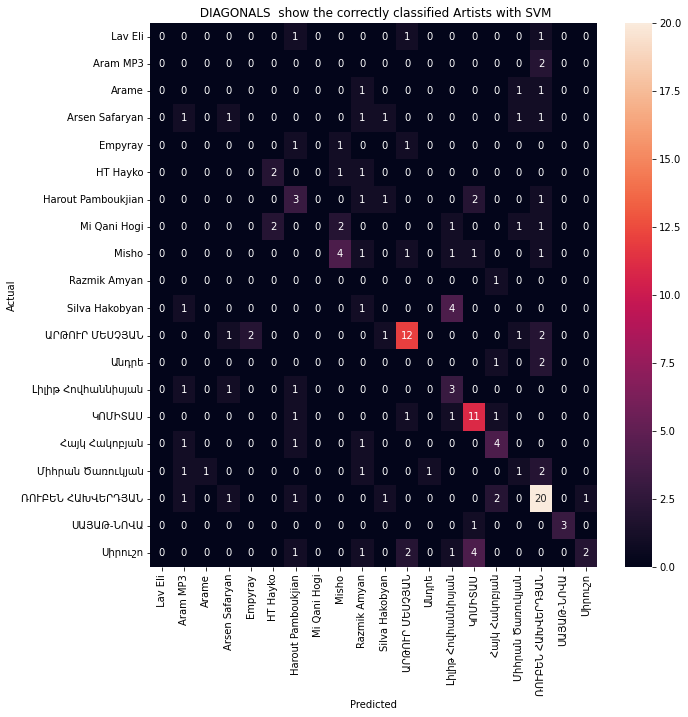

In [26]:
y_pred = model.predict(X_test)


y_test_artist = encoder.inverse_transform(y_test)
y_pred_artist = encoder.inverse_transform(y_pred)


conf_matrix = confusion_matrix(y_test_artist, y_pred_artist)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title(" DIAGONALS  show the correctly classified Artists with SVM")
plt.show()

In [27]:
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'F1 Score: {f1}')

F1 Score: 0.4184955482866548
